## 5.1-1 

(1) 5-1의 CNN으로 MNIST 손글씨 식별 모델을 저장 후, 해당 모델을 이용하여 연습한 내용입니다.  <br><br>
(2) 이번에는 종이에 수기로 1 ~ 9 까지 작성 후, 해당 숫자를 잘 선별 할 수 있는지 확인해 보았습니다.<br><br>

### 수기로 작성한 숫자 이미지
![title](./image/0~9.jpg)

In [1]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
# InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)         # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

In [2]:
# Image Control을 위해 PIL(Python Image Library) 사용
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt
import os

# 위의 Image 중 '8' 을 선택

In [3]:
# Test Data로 숫자 8을 선택
image_path = './image/8.jpg'

In [4]:
# Image Resizing : 수기로 작성한 숫자 image를 CNN에 주입 할 수 있도록 (28 * 28) 행렬의 이미지로 변환하여 저장
image = Image.open(image_path)
resize_image = image.resize((28,28))
resize_image.save(image_path)

In [5]:
# 해당 image를 흑백 (grey scale) image로 변환하여 재 저장
image_file = Image.open(image_path) 
image_file = image_file.convert('L') 
image_file.save('result1.jpg')

# 흑백 색상 반전을 위해 행렬의 각 원소를 255에서  차감 함
img_array = np.array(image_file)
numberOne = 255 - img_array

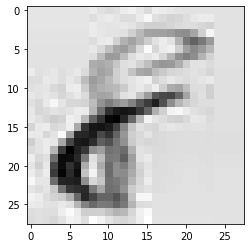

In [6]:
# 해당 Image Display
from skimage import color
plt.imshow(color.rgb2gray(img_array), cmap=plt.cm.gray)
plt.show()

In [20]:
# 5-1 예제에서 저장한 MNIST 숫자 식별 CNN 모델 불러옴
from keras.models import load_model
model = load_model('mnist_cnn.h5')

In [8]:
import keras
import numpy as np
from keras import layers
from keras import models
from keras.utils import to_categorical

#  CNN에 주입하기 위해 2차원 행렬(28 * 28)를 4차원 텐서(10000 * 28 * 28 * 1)로 reshape 하고, 255로 나누어 정규화
test_images = numberOne.reshape((1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# 정답 Label (8)을 one-hot encoding으로 저장
numberTest = np.array([[0,0,0,0,0,0,0,0,1,0]])
test_labels = numberTest

# test_image, test_label shape 확인
test_images.shape
test_labels.shape

(1, 28, 28, 1)

(1, 10)

In [9]:
# predict method로 test image 식별하여 label 값과 동일한지 확인
predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis=1)
tests_labels = np.argmax(test_labels, axis=1)

predicted_labels
tests_labels

array([8])

array([8])

<Figure size 1728x1152 with 0 Axes>

Text(0.5, 1.0, 'Predict:8  Label:8')

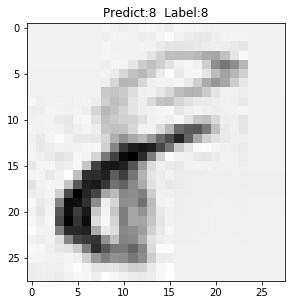

In [10]:
# 해당 image display (다중 image에 대한 test 및 결과 display 시 재사용 예정)
import numpy as np
import random
import matplotlib.pyplot as plt

result = []

for n in range(0, len(tests_labels)):
        result.append(n)

samples = result
count = 0
nrows = ncols = 4

plt.figure(figsize=(24,16))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Predict:" + str(predicted_labels[n])+"  Label:"+str(tests_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

# 위의 Image 중 '3' 을 선택

In [11]:
# Test Data로 숫자 8을 선택
image_path = './image/3.jpg'

In [12]:
# Image Resizing : 수기로 작성한 숫자 image를 CNN에 주입 할 수 있도록 (28 * 28) 행렬의 이미지로 변환하여 저장
image = Image.open(image_path)
resize_image = image.resize((28,28))
resize_image.save(image_path)

In [13]:
# 해당 image를 흑백 (grey scale) image로 변환하여 재 저장
image_file = Image.open(image_path) 
image_file = image_file.convert('L') 
image_file.save('result1.jpg')

# 흑백 색상 반전을 위해 행렬의 각 원소를 255에서  차감 함
img_array = np.array(image_file)
numberOne = 255 - img_array

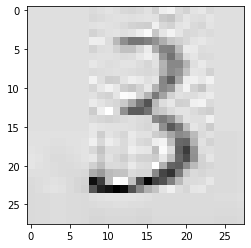

In [14]:
# 해당 Image Display
from skimage import color
plt.imshow(color.rgb2gray(img_array), cmap=plt.cm.gray)
plt.show()

In [15]:
# 5-1 예제에서 저장한 MNIST 숫자 식별 CNN 모델 불러옴
from keras.models import load_model
model = load_model('mnist_cnn.h5')

In [16]:
import keras
import numpy as np
from keras import layers
from keras import models
from keras.utils import to_categorical

#  CNN에 주입하기 위해 2차원 행렬(28 * 28)를 4차원 텐서(10000 * 28 * 28 * 1)로 reshape 하고, 255로 나누어 정규화
test_images = numberOne.reshape((1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# 정답 Label (8)을 one-hot encoding으로 저장
numberTest = np.array([[0,0,0,1,0,0,0,0,0,0]])
test_labels = numberTest

# test_image, test_label shape 확인
test_images.shape
test_labels.shape

(1, 28, 28, 1)

(1, 10)

In [17]:
# predict method로 test image 식별하여 label 값과 동일한지 확인
predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis=1)
tests_labels = np.argmax(test_labels, axis=1)

predicted_labels
tests_labels

array([3])

array([3])

<Figure size 1728x1152 with 0 Axes>

Text(0.5, 1.0, 'Predict:3  Label:3')

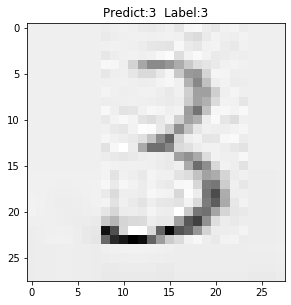

In [18]:
# 해당 image display (다중 image에 대한 test 및 결과 display 시 재사용 예정)
import numpy as np
import random
import matplotlib.pyplot as plt

result = []

for n in range(0, len(tests_labels)):
        result.append(n)

samples = result
count = 0
nrows = ncols = 4

plt.figure(figsize=(24,16))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Predict:" + str(predicted_labels[n])+"  Label:"+str(tests_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()